In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

# Thinkful - Preparing to Model Challenge

The dataset for this challenge was taken from the home credit default risk training data on Kaggle.

Data Source: https://www.kaggle.com/c/home-credit-default-risk

In [2]:
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('husl')
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
df = pd.read_csv('home-credit-default-risk/application_train.csv')

In [4]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

### Univariate Exploration: How many variables do I have?

In [5]:
print('Training data shape: ', df.shape)

df.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Univariate Exploration: Which variables are continuous and which are categorical?

As we can see from above it appears that the following variables are categorical:
*       name_contract_type
*       code_gender
*       flag_own_car
*       flag_own_realty

And the following are continuous:
*       cnt_children
*       amt_income_total
*       amt_credit

(This of course is not an exhaustive list.)

In [6]:
#change column titles to all lowercase
df.columns = [x.lower() for x in df.columns]
df.columns.values

array(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'own_car_age',
       'flag_mobil', 'flag_emp_phone', 'flag_work_phone',
       'flag_cont_mobile', 'flag_phone', 'flag_email', 'occupation_type',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'weekday_appr_process_start',
       'hour_appr_process_start', 'reg_region_not_live_region',
       'reg_region_not_work_region', 'live_region_not_work_region',
       'reg_city_not_live_city', 'reg_city_not_work_city',
       'live_city_not_work_city', 'organization_type', 'ext_source_1',
       'ext_source_2', 'ext_source_3',

### Univariate Exploration: Do I have missing data? If so, how much?

In [7]:
nulls = pd.DataFrame(data=(df.isnull().sum()), columns=['sum_nulls'])
nulls = nulls.loc[(nulls != 0).any(axis=1)]
nulls = nulls.reset_index()
nulls.rename(columns = {'index':'column_names'}, inplace=True)
nulls.sort_values('sum_nulls', ascending=False).head(10)

,column_names,sum_nulls
41,commonarea_medi,214865
13,commonarea_avg,214865
27,commonarea_mode,214865
49,nonlivingapartments_medi,213514
35,nonlivingapartments_mode,213514
21,nonlivingapartments_avg,213514
51,fondkapremont_mode,210295
33,livingapartments_mode,210199
47,livingapartments_medi,210199
19,livingapartments_avg,210199


## Define the outcome variable

Here the outcome variable is already defined for us.  The target is to predict if a loan was repaid on time (value = 0) or not repaid on time (value = 1).

In [8]:
#show number of loans in each category - target is what we are trying to predict
#target 0 = loan repaid on time
#target 1 = loan not repaid on time
df['target'].value_counts()

0    282686
1     24825
Name: target, dtype: int64

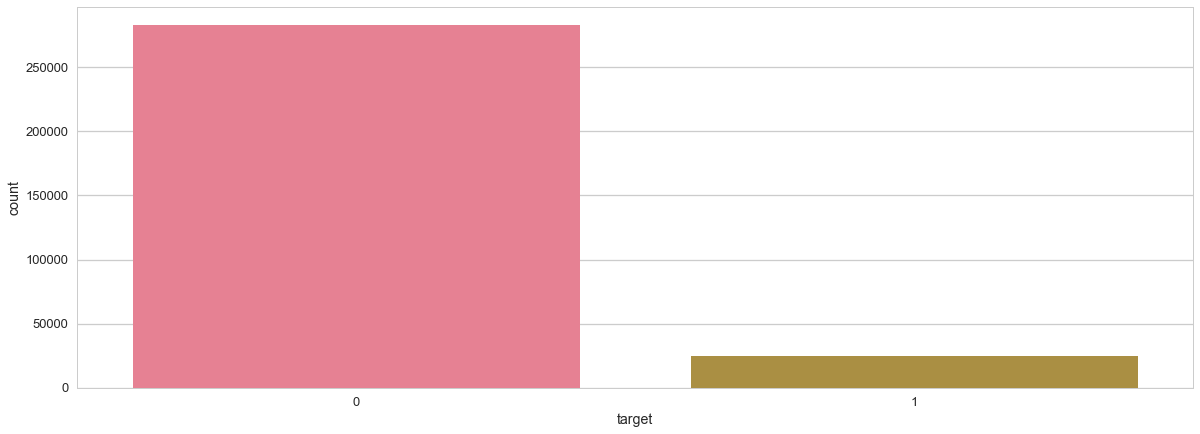

In [9]:
#imbalanced class!  more loans paid on time than not!
sns.countplot(df.target);

## Categorical Variable = flag_own_car
(Flag if the client owns a car)


N    202924
Y    104587
Name: flag_own_car, dtype: int64


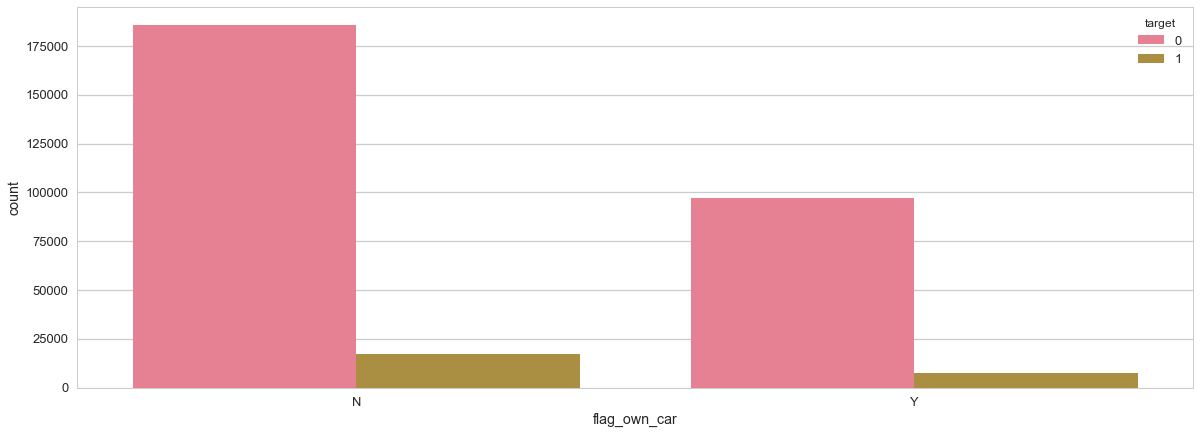

In [10]:
#plot owning car against target
print(df.flag_own_car.value_counts())
sns.countplot(df.flag_own_car, hue=df.target);

## Categorical Variable = code_gender
(gender of client)

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64


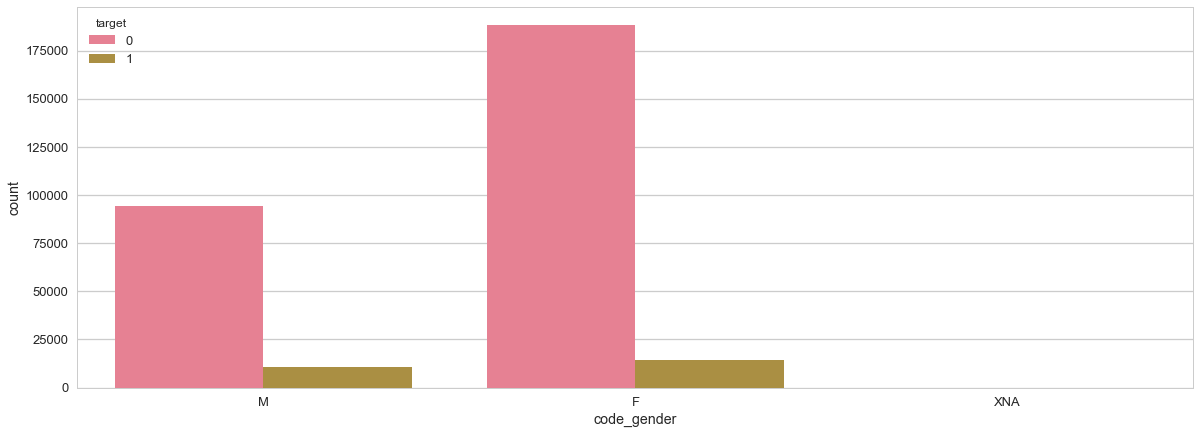

In [11]:
#plot gender against target
print(df.code_gender.value_counts())
sns.countplot(df.code_gender, hue=df.target);

## Continuous Variables = cnt_children, cnt_fam_members
(Number of children the client has and family members respecively)

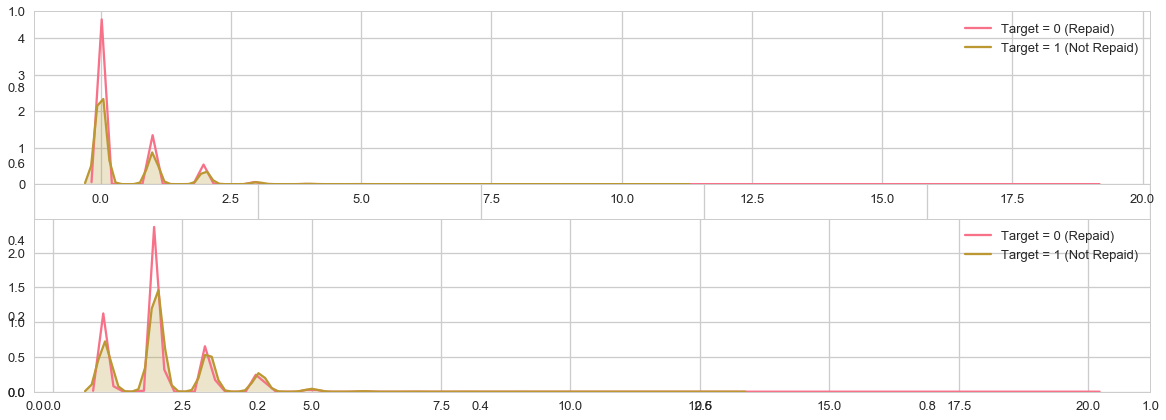

In [12]:
fig, ax = plt.subplots()

fig.add_subplot(211)
sns.kdeplot(df.loc[df['target'] == 0,'cnt_children'], label='Target = 0 (Repaid)')
sns.kdeplot(df.loc[df['target'] == 1,'cnt_children'], label='Target = 1 (Not Repaid)', shade=True)

df.cnt_fam_members.dropna(inplace=True)

fig.add_subplot(212)
sns.kdeplot(df.loc[df['target'] == 0,'cnt_fam_members'], label='Target = 0 (Repaid)')
sns.kdeplot(df.loc[df['target'] == 1,'cnt_fam_members'], label='Target = 1 (Not Repaid)', shade=True)

plt.show();


## Continuous Variable = days_last_phone_change
(How many days before application did client change phone)

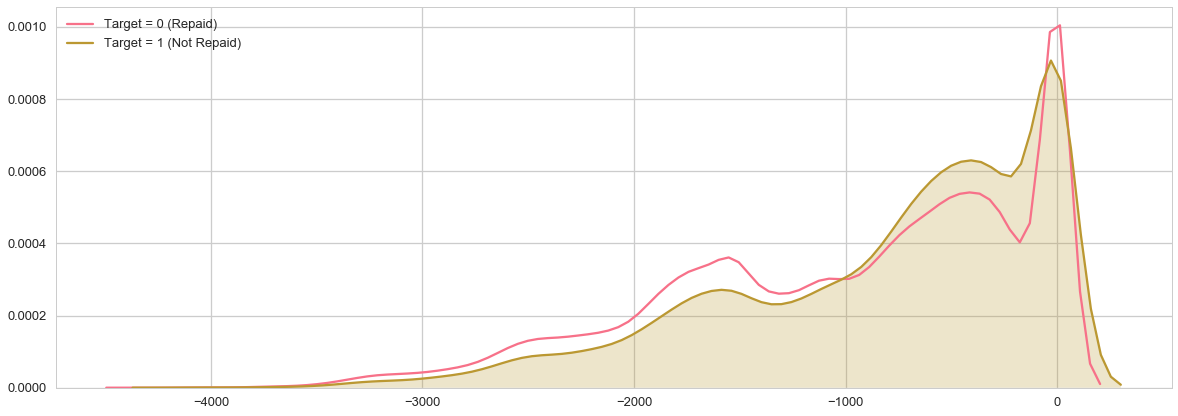

In [13]:
#plot days since phone change against target
#one null value - have to drop for kdeplot to work
df.days_last_phone_change.dropna(inplace=True)
df.days_last_phone_change.isnull().sum()

sns.kdeplot(df.loc[df['target'] == 0,'days_last_phone_change'], label='Target = 0 (Repaid)')
sns.kdeplot(df.loc[df['target'] == 1,'days_last_phone_change'], label='Target = 1 (Not Repaid)', shade=True)
plt.show();

## Categorical Variable = region_population_relative
(Normalized population of region where client lives (higher number means the client lives in more populated region))

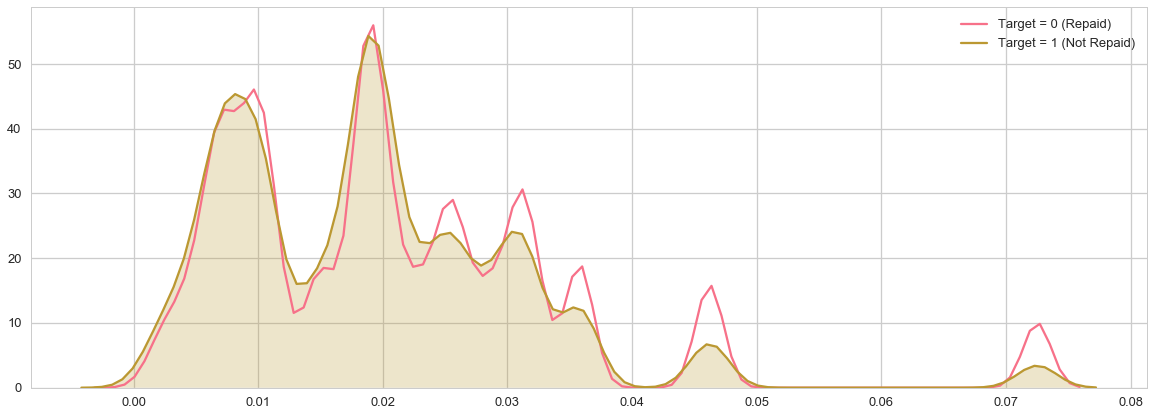

In [14]:
sns.kdeplot(df.loc[df['target'] == 0,'region_population_relative'], label='Target = 0 (Repaid)')
sns.kdeplot(df.loc[df['target'] == 1,'region_population_relative'], label='Target = 1 (Not Repaid)', shade=True)
plt.show();

## Continuous Variables = ext_source_1, ext_source_2, ext_source_3
(Normalized scores from external data sources)

                target  ext_source_1  ext_source_2  ext_source_3
target        1.000000     -0.155317     -0.160472     -0.178919
ext_source_1 -0.155317      1.000000      0.213982      0.186846
ext_source_2 -0.160472      0.213982      1.000000      0.109167
ext_source_3 -0.178919      0.186846      0.109167      1.000000


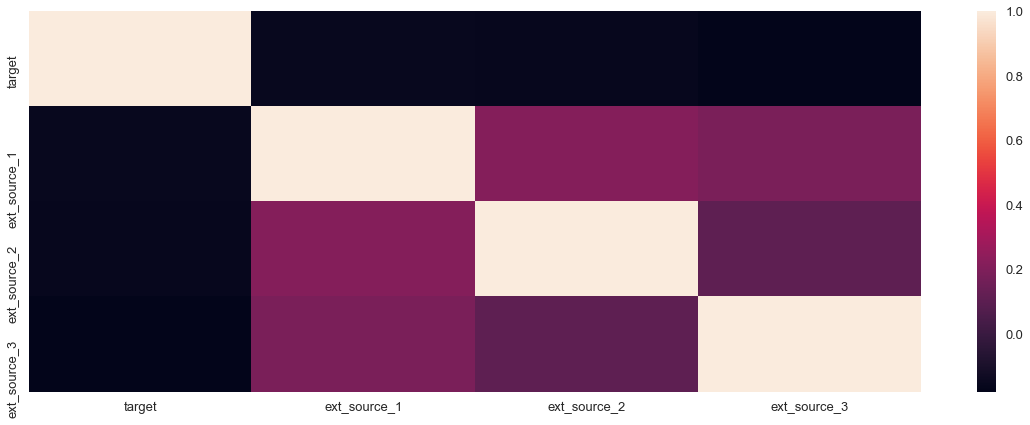

In [15]:
ext_source_df = df[['target', 'ext_source_1', 'ext_source_2', 'ext_source_3']]

corr = ext_source_df.corr()
print(corr)
sns.heatmap(corr)

In [16]:
#checking for missing values
ext_source_df.isnull().sum()

target               0
ext_source_1    173378
ext_source_2       660
ext_source_3     60965
dtype: int64

In [17]:
#missing values as percentage
ext_source_df.isnull().sum()/ext_source_df.shape[0]

target          0.000000
ext_source_1    0.563811
ext_source_2    0.002146
ext_source_3    0.198253
dtype: float64

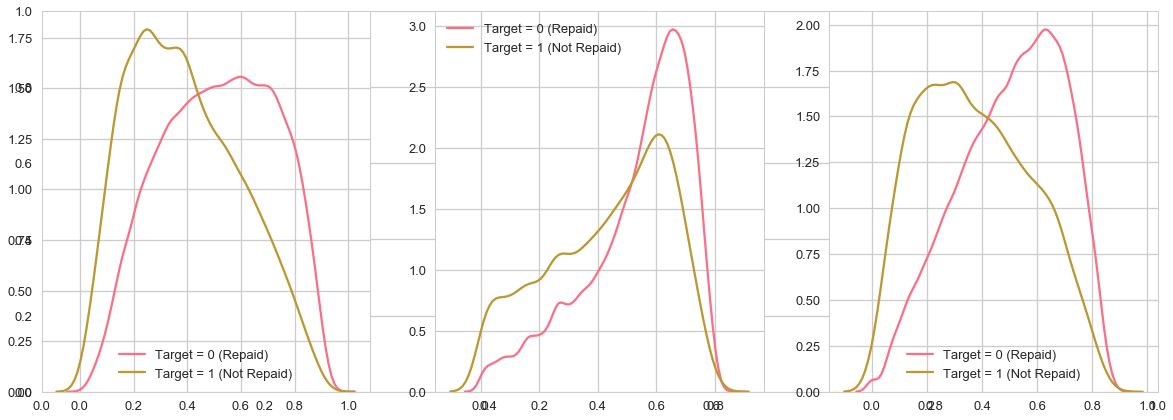

In [18]:
#drop missing values
ext_source_df = ext_source_df.dropna()

fig, ax = plt.subplots()

fig.add_subplot(131)
sns.kdeplot(ext_source_df.loc[ext_source_df['target'] == 0,'ext_source_1'], label='Target = 0 (Repaid)')
sns.kdeplot(ext_source_df.loc[ext_source_df['target'] == 1,'ext_source_1'], label='Target = 1 (Not Repaid)')

fig.add_subplot(132)
sns.kdeplot(ext_source_df.loc[ext_source_df['target'] == 0,'ext_source_2'], label='Target = 0 (Repaid)')
sns.kdeplot(ext_source_df.loc[ext_source_df['target'] == 1,'ext_source_2'], label='Target = 1 (Not Repaid)')

fig.add_subplot(133)
sns.kdeplot(ext_source_df.loc[ext_source_df['target'] == 0,'ext_source_3'], label='Target = 0 (Repaid)')
sns.kdeplot(ext_source_df.loc[ext_source_df['target'] == 1,'ext_source_3'], label='Target = 1 (Not Repaid)')

plt.show();

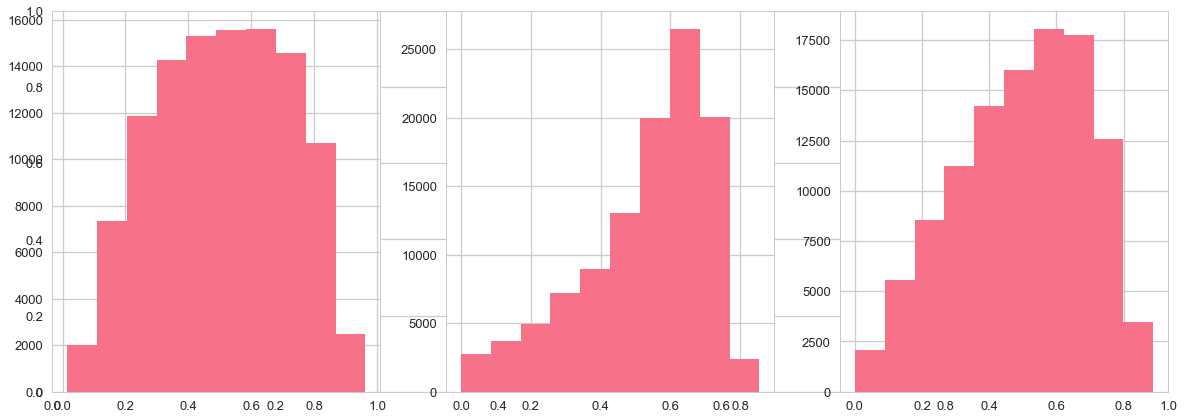

In [19]:
fig, ax = plt.subplots()

fig.add_subplot(131)
plt.hist(ext_source_df.ext_source_1)

fig.add_subplot(132)
plt.hist(ext_source_df.ext_source_2)

fig.add_subplot(133)
plt.hist(ext_source_df.ext_source_3)

plt.show;

In [20]:
target=ext_source_df['target']
ext_source_df = ext_source_df.drop('target', 1)

## PCA on ext_source_df

In [21]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(ext_source_df)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[1.00000913 0.20662743 0.18676123]
 [0.20662743 1.00000913 0.11524128]
 [0.18676123 0.11524128 1.00000913]]


How many components should we keep?

The most straightforward rule for choosing numbr of components to keep is to keep only components with eigenvalues > 1 because they contain more information than a single variable.

In [22]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[0.63150249]
 [0.56182312]
 [0.53437757]]
Eigenvalue 1: 1.341874886120123
----------------------------------------
Eigenvector 2: 
[[ 0.77282794]
 [-0.51187738]
 [-0.37512469]]
Eigenvalue 2: 0.7724983866747692
----------------------------------------
Eigenvector 3: 
[[-0.06278207]
 [-0.64987409]
 [ 0.75744444]]
Eigenvalue 3: 0.8856541024651715
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.44728755 0.25749711 0.29521534]


Visualize the eigenvalues in order from highest to lowest, connecting them with a line in a "scree" plot. 

Keep keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the "elbow".

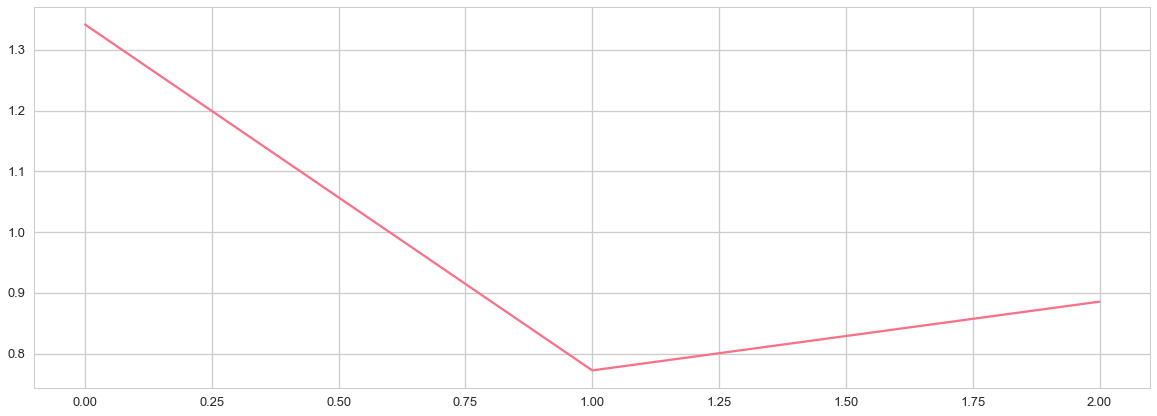

In [23]:
plt.plot(eig_val_cov)
plt.show()

The scree plot and the eigenvalues >1 rule agree that we should keep only the first component.

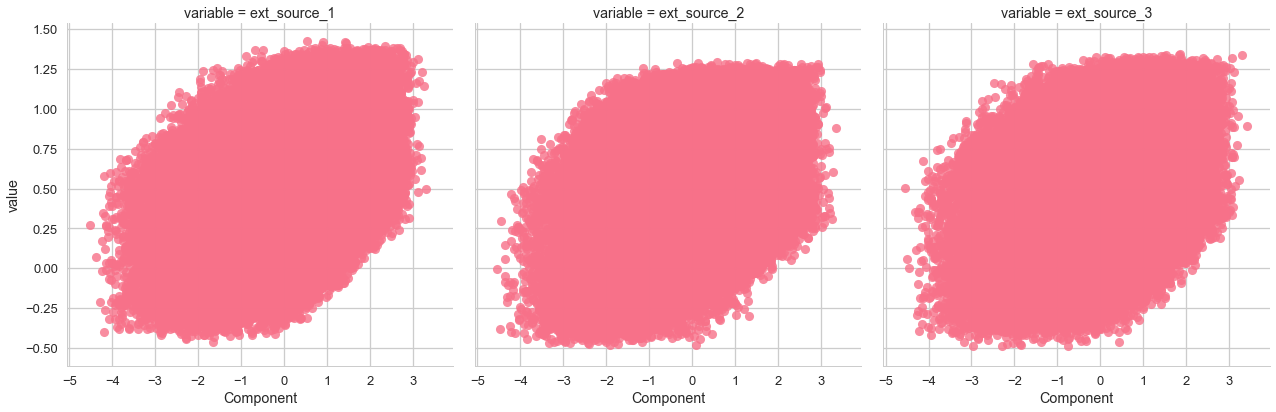

In [24]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = ext_source_df[['ext_source_1', 'ext_source_2', 'ext_source_3']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=6)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.44728755 0.29521534 0.25749711]


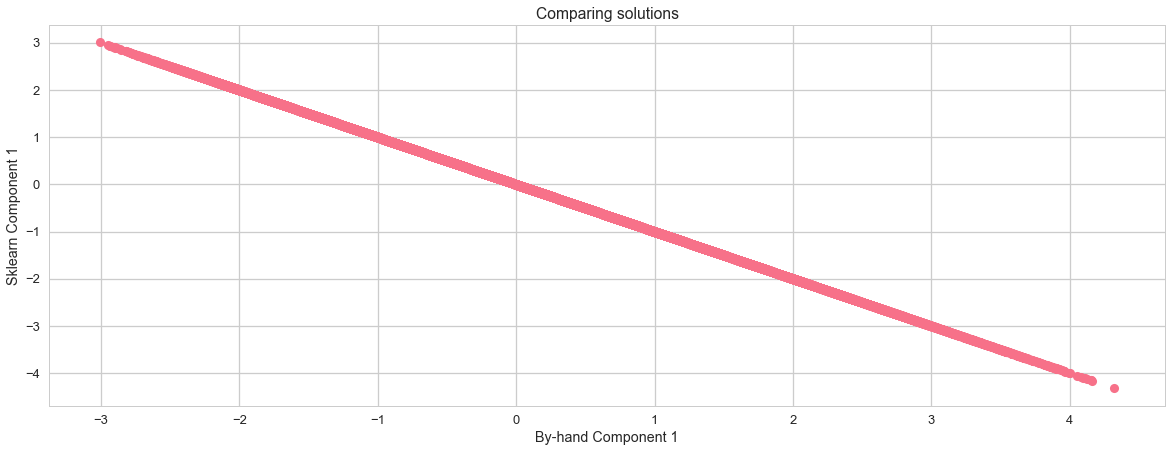

In [25]:
#pca with sklearn's built in function
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

## More feature selection

Here I check to find correlated variables and then run a PCA to reduce the number of features.

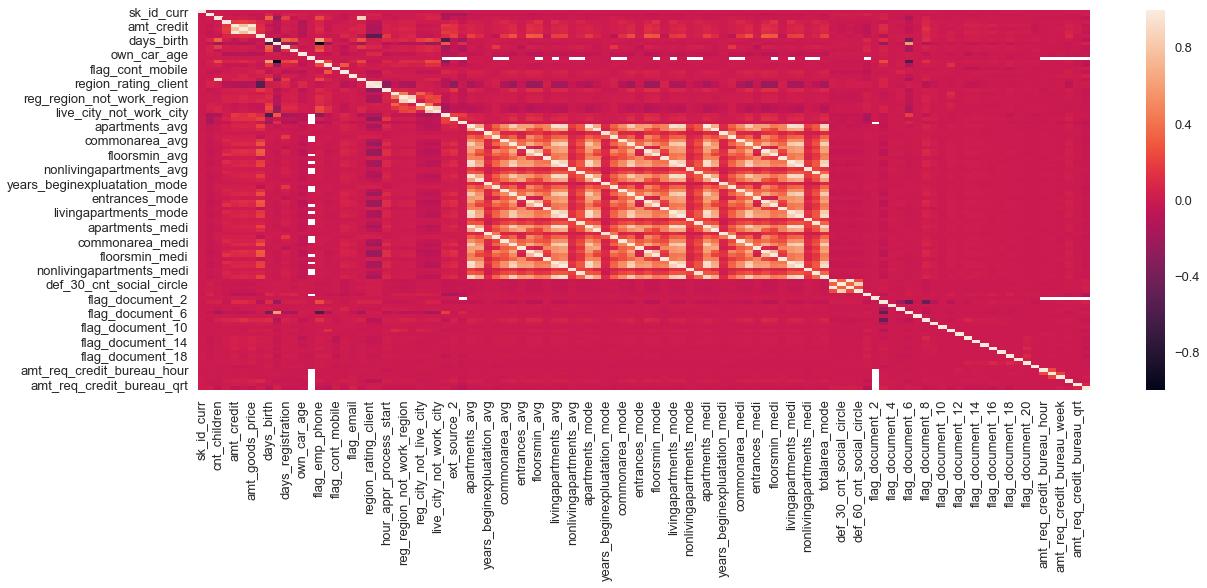

In [26]:
#it looks like highly correlated values are in the middle - apartments_avg through nonlivingapartments_medi?
sns.heatmap(df.corr());

In [27]:
#zooming in on columns apartments_avg through nonlivingapartments_medi
df2 = df[['apartments_avg',
       'basementarea_avg', 'years_beginexpluatation_avg',
       'years_build_avg', 'commonarea_avg', 'elevators_avg',
       'entrances_avg', 'floorsmax_avg', 'floorsmin_avg', 'landarea_avg',
       'livingapartments_avg', 'livingarea_avg',
       'nonlivingapartments_avg', 'nonlivingarea_avg', 'apartments_mode',
       'basementarea_mode', 'years_beginexpluatation_mode',
       'years_build_mode', 'commonarea_mode', 'elevators_mode',
       'entrances_mode', 'floorsmax_mode', 'floorsmin_mode',
       'landarea_mode', 'livingapartments_mode', 'livingarea_mode',
       'nonlivingapartments_mode', 'nonlivingarea_mode',
       'apartments_medi', 'basementarea_medi',
       'years_beginexpluatation_medi', 'years_build_medi',
       'commonarea_medi', 'elevators_medi', 'entrances_medi',
       'floorsmax_medi', 'floorsmin_medi', 'landarea_medi',
       'livingapartments_medi', 'livingarea_medi',
       'nonlivingapartments_medi', 'nonlivingarea_medi']]

#creating correlation matrix
df2_corr = df2.corr()

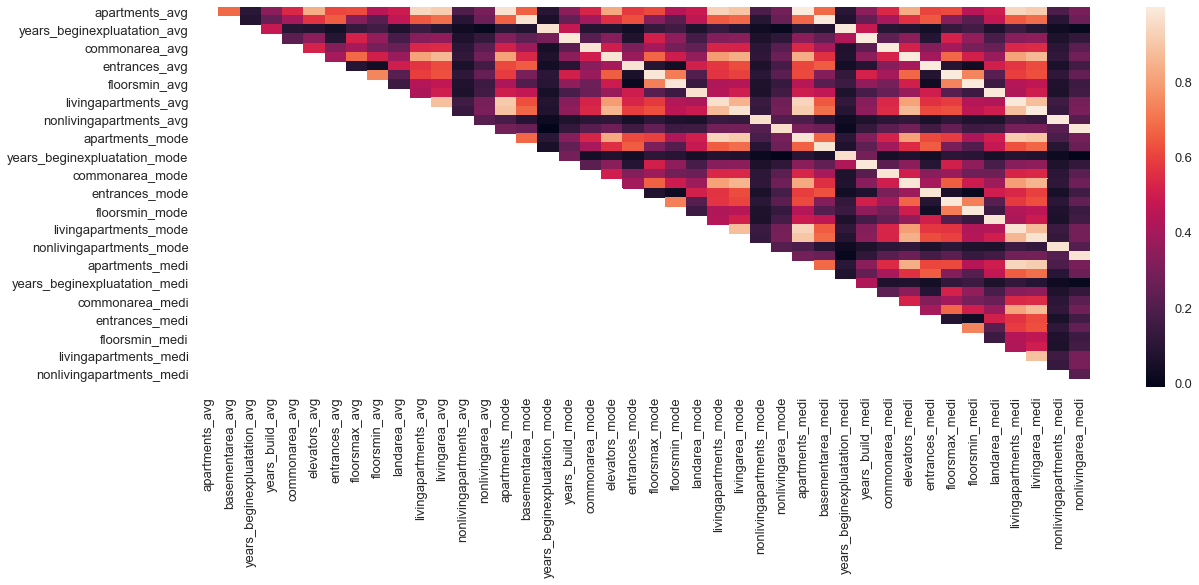

In [28]:
#dropping highly correlated features
#code from: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Select upper triangle of correlation matrix
upper = df2_corr.where(np.triu(np.ones(df2_corr.shape), k=1).astype(np.bool))
sns.heatmap(upper)
plt.show;

In [29]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print('Columns to drop: ' , (len(to_drop)))

# Drop features 
df2 = df2.drop(columns=to_drop)
print('df2 shape: ', df2.shape)

Columns to drop:  28
df2 shape:  (307511, 14)


In [36]:
corr_df2 = df2.corr()

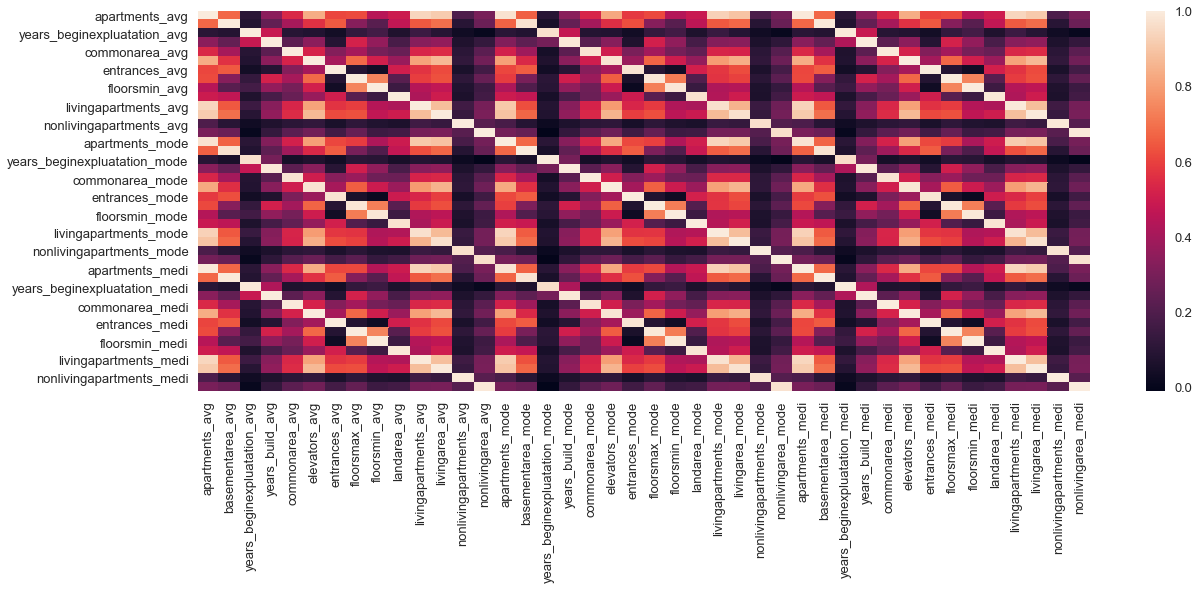

In [31]:
sns.heatmap(df2_corr);

## PCA with df2

In [40]:
#checking for null values
df2.isnull().sum()

#null values as percent
df2.isnull().sum()/df2.shape[0]

apartments_avg                 0.507497
basementarea_avg               0.585160
years_beginexpluatation_avg    0.487810
years_build_avg                0.664978
commonarea_avg                 0.698723
elevators_avg                  0.532960
entrances_avg                  0.503488
floorsmax_avg                  0.497608
floorsmin_avg                  0.678486
landarea_avg                   0.593767
livingapartments_avg           0.683550
livingarea_avg                 0.501933
nonlivingapartments_avg        0.694330
nonlivingarea_avg              0.551792
dtype: float64

In [57]:
#dropping null values
df2 = df2.dropna()

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [49]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df2)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[1.00001226 0.66399802 0.1814935  0.34857369 0.54071534 0.84821998
  0.58566602 0.61832279 0.46168586 0.42759363 0.94906172 0.92004866
  0.19424398 0.31227575]
 [0.66399802 1.00001226 0.12411476 0.252048   0.40153301 0.56414655
  0.64574386 0.32645736 0.23149931 0.41307483 0.64691083 0.67774041
  0.10341151 0.25854932]
 [0.1814935  0.12411476 1.00001226 0.47604829 0.1050295  0.17459955
  0.048527   0.25846477 0.17835277 0.08499413 0.16345744 0.17840714
  0.03688228 0.05766379]
 [0.34857369 0.252048   0.47604829 1.00001226 0.23315427 0.3526843
  0.08972095 0.53094816 0.37340383 0.18071916 0.33819665 0.36761866
  0.07314569 0.13242574]
 [0.54071534 0.40153301 0.1050295  0.23315427 1.00001226 0.52088993
  0.32586749 0.40324295 0.29377269 0.2446888  0.53383925 0.54449782
  0.11675695 0.22938418]
 [0.84821998 0.56414655 0.17459955 0.3526843  0.52088993 1.00001226
  0.39390856 0.6980302  0.52784467 0.32728873 0.81578145 0.87965612
  0.13680212 0.2858408 ]
 [0.58566602 0.

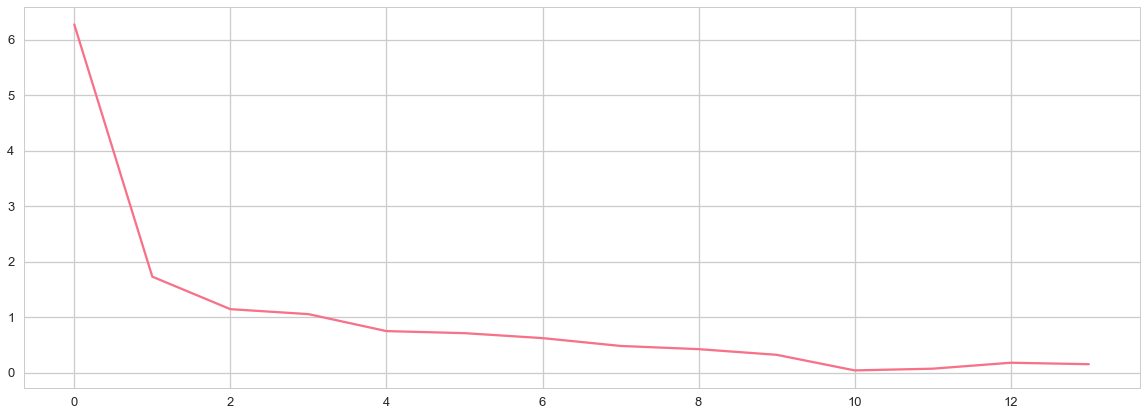

In [56]:
plt.plot(eig_val_cov)
plt.show()

In [55]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 14).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.37556524]
 [-0.2905004 ]
 [-0.10775681]
 [-0.1943007 ]
 [-0.24943908]
 [-0.35392278]
 [-0.23238654]
 [-0.29095452]
 [-0.23228295]
 [-0.19747083]
 [-0.36578594]
 [-0.37699385]
 [-0.08326718]
 [-0.15247793]]
Eigenvalue 1: 6.274025461045184
----------------------------------------
Eigenvector 2: 
[[-0.08753905]
 [-0.27252366]
 [ 0.34148076]
 [ 0.39984892]
 [-0.0367823 ]
 [ 0.0507638 ]
 [-0.47385132]
 [ 0.41419432]
 [ 0.40217351]
 [-0.25393118]
 [-0.09303051]
 [-0.08119801]
 [ 0.00726618]
 [-0.00569387]]
Eigenvalue 2: 1.732377135626452
----------------------------------------
Eigenvector 3: 
[[ 0.02839336]
 [-0.12745128]
 [-0.46353612]
 [-0.31399043]
 [ 0.0966321 ]
 [ 0.07536187]
 [-0.2122002 ]
 [ 0.11104421]
 [ 0.11121749]
 [-0.23807497]
 [ 0.01938293]
 [-0.00085057]
 [ 0.55210552]
 [ 0.47209258]]
Eigenvalue 3: 1.1471981297245708
----------------------------------------
Eigenvector 4: 
[[ 0.06587881]
 [-0.08341528]
 [-0.50810281]
 [-0.29386333]
 [ 0.0811659 ]
 [ 0.183

According to eigenvalues rule we should keep the first 2 components.

In [50]:
# Make an instance of the model - lets see what keeping 95% of variance looks like
pca = PCA(.95)

In [51]:
principal_components = pca.fit_transform(df2)

principalDf = pd.DataFrame(data = principal_components)
principalDf.shape

(81566, 10)

It did help reduce the number of features from 14 to 10, but the eigenvalues say we should only keep 2 features.  After modeling maybe we can have a clearer idea which option to choose.